<a href="https://colab.research.google.com/github/tanyagupta1/Machine-Learning/blob/main/tensorflowtut1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


8

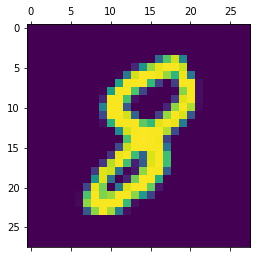

In [11]:
len(X_train)
plt.matshow(X_train[2507])
y_train[2507]

In [17]:
X_train_flat=X_train.reshape(len(X_train),28*28)
X_test_flat=X_test.reshape(len(X_test),784)


In [18]:
X_train_flat=X_train_flat/255
X_test_flat=X_test_flat/255

In [20]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4678 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3034 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2733 - accuracy: 0.9230
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9258


In [21]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2718 - accuracy: 0.9247


[0.2718074321746826, 0.9247000217437744]

In [22]:
y_predicted=model.predict(X_test_flat)
np.argmax(y_predicted[0])

7

In [23]:
comp_model=keras.Sequential([keras.layers.Dense(100,input_shape=(784,),activation='relu'),
                             keras.layers.Dense(10,activation='sigmoid')])
comp_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
comp_model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2685 - accuracy: 0.9235
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1208 - accuracy: 0.9637
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0842 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0632 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0492 - accuracy: 0.9850


In [25]:
comp_model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0808 - accuracy: 0.9749


[0.08079811930656433, 0.9749000072479248]

In [27]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    0,    2,    0,    5,    2,    2,    2,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   8,    9,  928,   12,   10,    4,   11,   10,   38,    2],
       [   5,    0,   23,  901,    1,   33,    2,   11,   28,    6],
       [   2,    2,    4,    1,  936,    0,    7,    3,    9,   18],
       [  12,    3,    6,   19,   11,  787,   11,    4,   33,    6],
       [  18,    3,   10,    1,    8,   14,  900,    2,    2,    0],
       [   2,   13,   22,    7,   10,    1,    0,  942,    2,   29],
       [  10,   12,    7,   15,   10,   24,    8,    8,  874,    6],
       [  11,    7,    1,    8,   51,    7,    0,   20,   10,  894]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

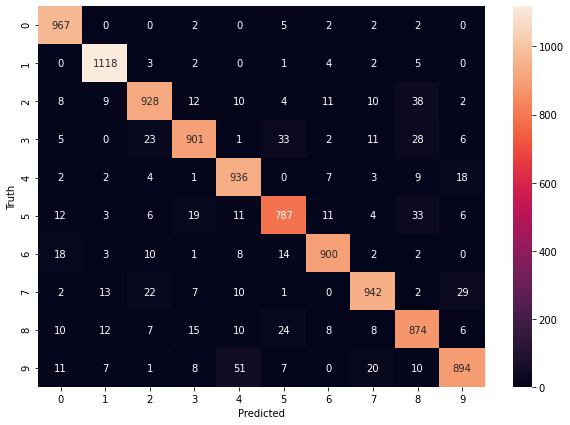

In [29]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')